In [3]:
import json
import os
import os.path as osp
import pandas as pd
import io
from io import StringIO
import jsonpickle
import matplotlib.pyplot as plt
import sys
import inspect
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import hex_to_rgb
from pathlib import Path
from sklearn.metrics import r2_score
from pandas import DataFrame
import numpy as np
from numpy import ndarray
from matplotlib import rc
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

from matplotlib.colors import BASE_COLORS, TABLEAU_COLORS
from typing import List

from gui import aux_functions
# import aux_functions
from bootstrapping import predict_gates
from models import BR_model_new

from utils.experiment_setup import ExperimentalSetup
from visualization.visualization import plot_fitting, plot_bootstrap_curves_w_ci
from models import BR_model_new


In [4]:
filename = "age_request_forecast.json"
bulletin_req_path = osp.join(filename)
with open(bulletin_req_path, 'rb') as f:
        bulletin_req_json = json.load(f)

In [5]:
simul_weekly = pd.read_csv(StringIO(jsonpickle.decode(
    bulletin_req_json["simul_weekly_pickled"])))
incidence = bulletin_req_json["simulation_parameters"]["incidence"]
exposed_values = bulletin_req_json['simulation_parameters']['exposed']
lambda_values = bulletin_req_json['simulation_parameters']['lambda']
a = bulletin_req_json['simulation_parameters']['a']
mu = bulletin_req_json['simulation_parameters']['mu']
delta = bulletin_req_json['simulation_parameters']['delta']
city = bulletin_req_json['simulation_parameters']['city']
year = bulletin_req_json['simulation_parameters']['year']

model_obj = jsonpickle.decode(bulletin_req_json["model_obj_pickled"])
y, population_immunity, rho, r0, rt = model_obj.make_simulation()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

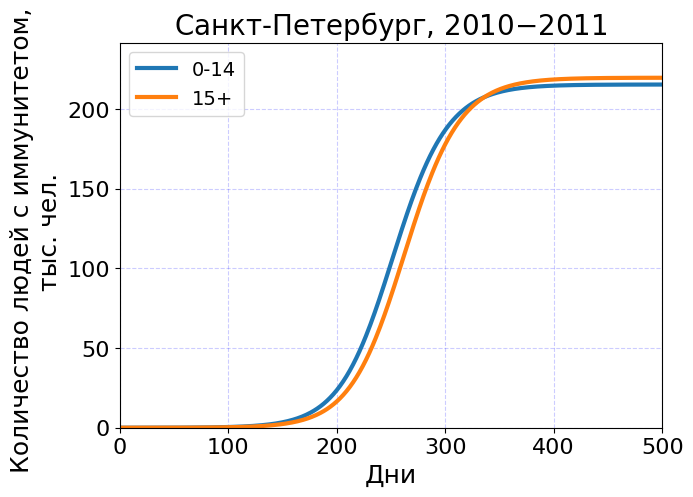

In [6]:
def plot_immune_population(population_immunity: ndarray, labels: List,
                           city: str, year: int, output_file: str):
    """Plots population immunity"""
    colors = list(TABLEAU_COLORS.keys()) + list(BASE_COLORS.keys())
    labels = [item.replace('15 и ст.', '15+').replace('_', " ")
              for item in labels]
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.rcParams["font.family"] = "Times New Roman"
    max_immun = 0
    for i, immun in enumerate(population_immunity):
        for j in range(0, len(immun)):
            idx = i if len(population_immunity) > 1 else j
            max_immun = max(max(immun[0]), max_immun)
            ax.plot(immun[j][:500]/1000, color=colors[i *
                     len(immun) + j], label=labels[idx], linewidth=3)
    
    plt.title(f"{city}, {year}$-${year + 1}", fontsize=20)
    plt.xlabel('Дни', fontsize = 18)
    plt.ylabel('Количество людей с иммунитетом, \n тыс. чел.', fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True, color='b', alpha=0.2, linestyle='--')
    plt.legend(fontsize=14)
    plt.xlim([0,500])
    plt.ylim([0, 1.1*max_immun/1000])
    plt.savefig(output_file, dpi=1200, bbox_inches='tight')

plot_immune_population(population_immunity, list(
            simul_weekly.columns), 'Санкт-Петербург', year, r'{}_immunne_population.png'.format(incidence)) 

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font famil

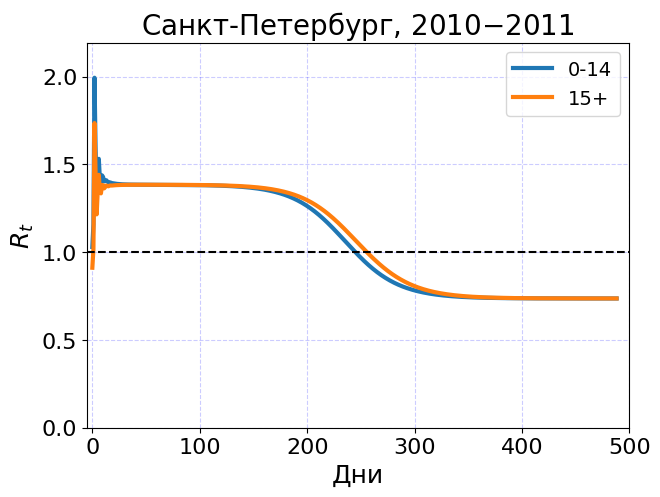

In [7]:
def plot_rt(rt: ndarray, labels: List, city: str, year: int, output_file: str):
    colors = list(TABLEAU_COLORS.keys()) + list(BASE_COLORS.keys())
    labels = [item.replace('15 и ст.', '15+').replace('_', " ")
              for item in labels]
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.rcParams["font.family"] = "Times New Roman"
    # plt.rcParams['text.usetex'] = True
    max_rt = 0
    for i, partial_rt in enumerate(rt):
        for j in range(0, len(partial_rt)):
            max_rt = max(max(partial_rt[0]), max_rt)
            idx = i if len(rt) > 1 else j
            plt.plot(partial_rt[j][11:500], color=colors[i *
                     len(partial_rt) + j], label=labels[idx], linewidth=3)

    plt.title(f"{city}, {year}$-${year + 1}", fontsize=20)
    plt.xlabel('Дни', fontsize = 18)
    plt.ylabel(r'$R_t$', fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True, color='b', alpha=0.2, linestyle='--')
    plt.legend(fontsize=14)
    plt.xlim([-5,500])
    plt.ylim([0, 1.1*max_rt])
    
    plt.axhline(y=1.0, color='black', linestyle='--')
    plt.savefig(output_file, dpi=1200, bbox_inches='tight')
    
plot_rt(rt, list(simul_weekly.columns), 'Санкт-Петербург',
                year, r'{}_rt.png'.format(incidence))


Creating beautiful plots...
66


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

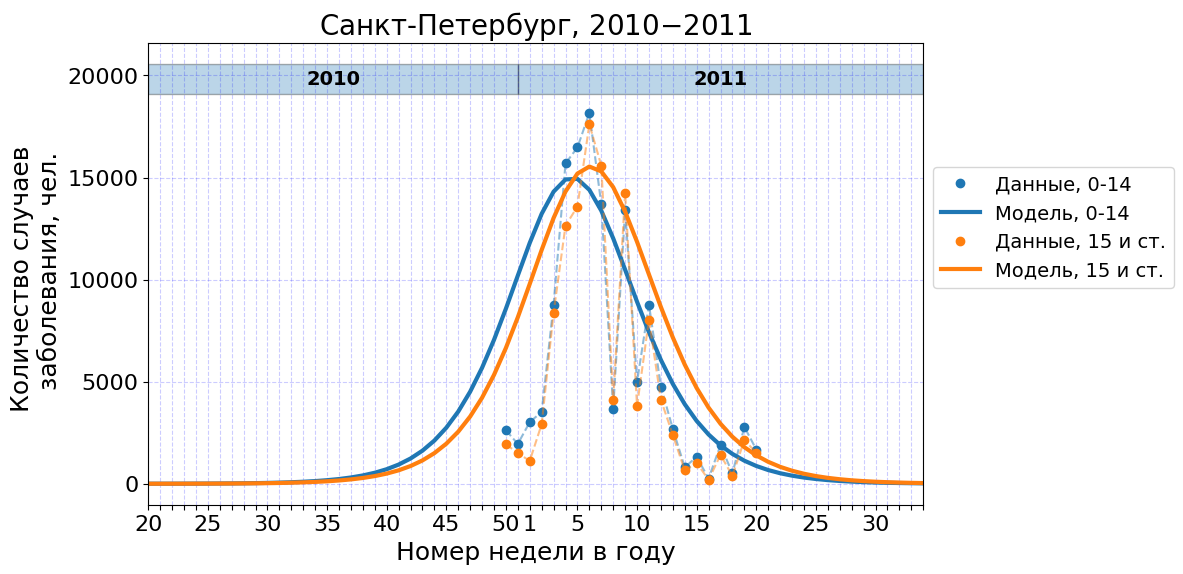

In [10]:
def make_plot(bulletin_req_json):
    print("Creating beautiful plots...")
    epid_data = pd.read_csv(StringIO(jsonpickle.decode(
        bulletin_req_json["epid_data_pickled"])))
    simul_weekly = pd.read_csv(StringIO(jsonpickle.decode(
        bulletin_req_json["simul_weekly_pickled"])))

    incidence = bulletin_req_json["simulation_parameters"]["incidence"]
    delta = bulletin_req_json['simulation_parameters']['delta']
    city = bulletin_req_json['simulation_parameters']['city_russian']
    year = bulletin_req_json['simulation_parameters']['year']
    bulletin_req_json['simulation_parameters']

    epid_data.index = epid_data.reset_index().index + delta
    m, n = epid_data.index[0], epid_data.index[-1]
    last_simul_ind = n + 15
    xticks_vals, xticks_text = aux_functions.generate_xticks(
        epid_data, year, last_simul_ind)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    
    colors = px.colors.qualitative.D3
    groups = bulletin_req_json['groups']
    labels = bulletin_req_json['groups']
    pos_x = xticks_vals[xticks_vals['year'] == year].index[-1]
    
    print(len(simul_weekly[groups[0]][:last_simul_ind]))

    max_incidence_value = 0
    
    for i, (group, label) in enumerate(zip(simul_weekly.columns, labels)):
        max_incidence_value = max(max(list(epid_data[group])), max(list(simul_weekly[group])), max_incidence_value)
        # data points
        plt.plot(epid_data[group].index,
                                 epid_data[group], '--', alpha=0.5, color=colors[i])
        plt.plot(epid_data[group].index,
                                 epid_data[group], 'o',color=colors[i], label='Данные, ' + label)
        
        # simulated curve
        plt.plot(simul_weekly[group].index[:last_simul_ind],
                                 simul_weekly[group][:last_simul_ind], color=colors[i],
                                 linewidth=3, label='Модель, ' + label)
    
    # plot settings
    y_lim_scale = 1.05
    x_min = 0
    x_max = len(simul_weekly[groups[0]][:last_simul_ind]) - 1
    y_min = 0
    y_max = y_lim_scale*max_incidence_value
    
    rec_height = 1500
    rec_width_left = pos_x
    rec_width_right = x_max - pos_x
    rec_anchor_left_x = 0
    rec_anchor_left_y = y_max
    ax.add_patch(Rectangle((rec_anchor_left_x, rec_anchor_left_y), rec_width_left, rec_height, alpha=0.3, edgecolor='k'))
    center_x = rec_anchor_left_x + rec_width_left/2
    center_y = rec_anchor_left_y + rec_height/2
    ax.annotate(year, (center_x, center_y), color='k', weight='bold', 
                fontsize=14, ha='center', va='center')
    rec_anchor_right_x = pos_x
    rec_anchor_right_y = y_max
    ax.add_patch(Rectangle((rec_anchor_right_x, rec_anchor_right_y), rec_width_right, rec_height, alpha=0.3, edgecolor='k'))
    center_x = rec_anchor_right_x + rec_width_right/2
    center_y = rec_anchor_right_y + rec_height/2
    ax.annotate(year+1, (center_x, center_y), color='k', weight='bold', 
                fontsize=14, ha='center', va='center')
    
    
    
    # plt.axvline(pos_x, alpha = 0.5)
    # plt.style.use('classic')
    plt.xlabel('Номер недели в году', fontsize = 18)
    plt.ylabel('Количество случаев \n заболевания, чел.', fontsize=18)
    plt.title(f"{city}, {year}$-${year + 1}", fontsize=20)
    plt.xticks(ticks=xticks_vals.index, labels=xticks_text)
    legend = ax.legend(fontsize=14, fancybox=True, # "upper center" puts it below the line
    ncol=1,  loc='center left', bbox_to_anchor=(1, 0.6)) 
    # plt.legend(fontsize=16, fancybox=True, loc="lower center", # "upper center" puts it below the line
    # ncol=1, bbox_to_anchor=(1.2, 0.6))
    # fig.tight_layout(pad=2)
    plt.xlim([x_min, x_max])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True, color='b', alpha=0.2, linestyle='--')

    if incidence == 'age-group':
        plt.savefig(os.path.join("age-group.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'strain':
        plt.savefig(os.path.join("strain.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'strain_age-group':
        plt.savefig(os.path.join("strain_age-group.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'total':
        plt.savefig(os.path.join("total.png"), dpi=800, bbox_inches='tight')
    plt.show()
    # epid_data.head()

make_plot(bulletin_req_json)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

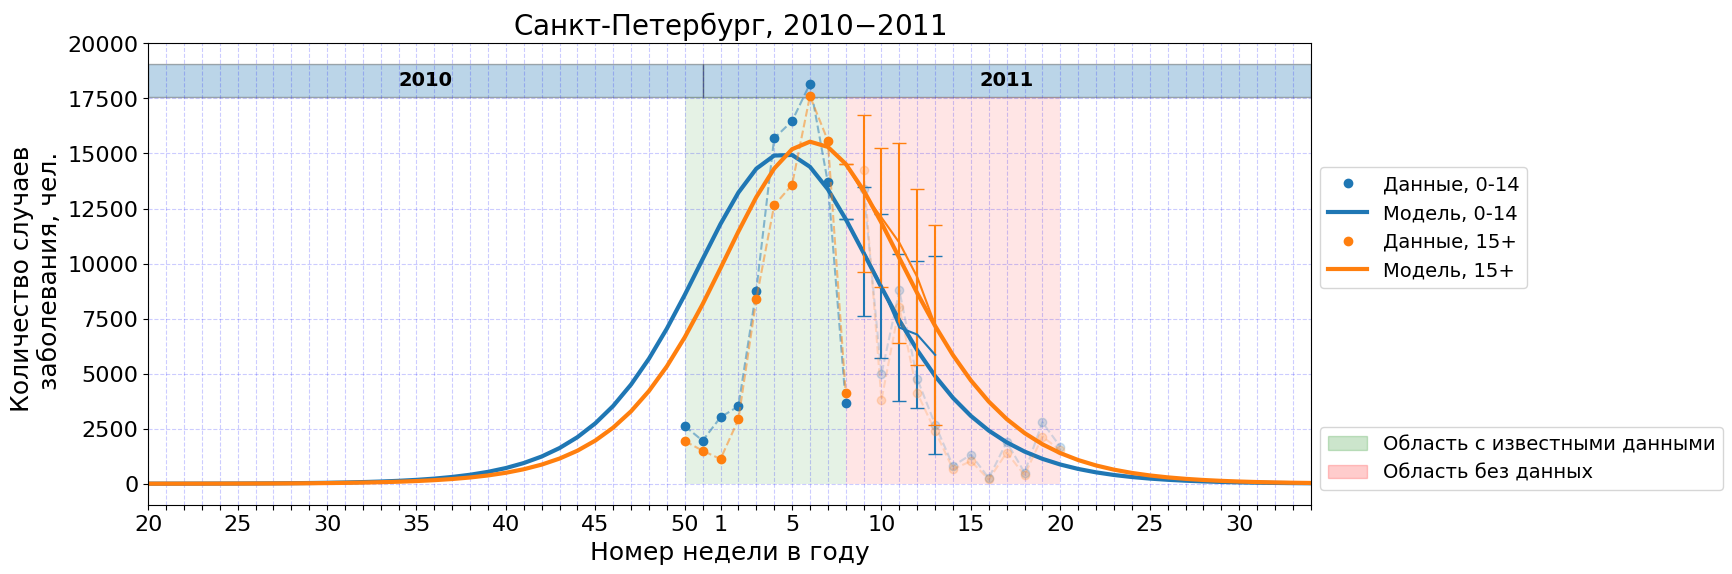

In [11]:
def make_plot_forecast(bulletin_req_json):
    epid_data = pd.read_csv(StringIO(jsonpickle.decode(
        bulletin_req_json["epid_data_pickled"])))
    simul_weekly = pd.read_csv(StringIO(jsonpickle.decode(
        bulletin_req_json["simul_weekly_pickled"])))

    incidence = bulletin_req_json["simulation_parameters"]["incidence"]
    exposed_values = bulletin_req_json['simulation_parameters']['exposed']
    lambda_values = bulletin_req_json['simulation_parameters']['lambda']
    a = bulletin_req_json['simulation_parameters']['a']
    mu = bulletin_req_json['simulation_parameters']['mu']
    delta = bulletin_req_json['simulation_parameters']['delta']
    city = bulletin_req_json['simulation_parameters']['city_russian']
    year = bulletin_req_json['simulation_parameters']['year']
    sample_size = int(
        bulletin_req_json['simulation_parameters']['sample_size'])
    inflation_parameter = bulletin_req_json['simulation_parameters']['inflation_parameter']
    forecast_term = int(
        bulletin_req_json['simulation_parameters']['inflation_parameter'])
    forecast_term = 5

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    colors = px.colors.qualitative.D3
    colors_unexistant = ["#383838", "#585858", "#696969", "#909090"]
    error_structures = ["#D3D3D3", "#E5E4E2", "#C0C0C0", "#A9A9A9"]
    exposed_list = exposed_values
    lam_list = lambda_values
    a_list = [a]
    year = int(year)
    exposed_list = aux_functions.prepare_exposed_list(incidence, exposed_list)



    epid_data.index = epid_data.reset_index().index + delta
    m, n = epid_data.index[0], epid_data.index[-1]
    last_simul_ind = n + 15

    ds_amount = int(100 / len(simul_weekly.columns))
    groups = bulletin_req_json['groups']
    labels = bulletin_req_json['groups']

    predict_gates_generator = predict_gates.PredictGatesGenerator(epid_data.loc[:, simul_weekly.columns],
                                                                  simul_weekly.dropna(
        axis=1),
        ds_amount, sample_size, inflation_parameter, end=last_simul_ind)
    percentiles = [(5, 95)]
    gates = [
        predict_gates_generator.generate_predict_gate(
            p[0], p[1], length=forecast_term)
        for p in percentiles
    ]

    xticks_vals, xticks_text = aux_functions.generate_xticks(
        epid_data, year, last_simul_ind)
    pos_x = xticks_vals[xticks_vals['year'] == year].index[-1]

    r_squared = r2_score(epid_data[groups], simul_weekly.iloc[delta:epid_data.index[-1] + 1, :],
                         multioutput='raw_values')

    labels = [group if '15 и ст.' not in group
              else group.replace('15 и ст.', '15+') for group in groups]

    max_incidence_value = 0
    
    for i, (group, label) in enumerate(zip(simul_weekly.columns, labels)):
        max_incidence_value = max(max(list(epid_data[group])), max(list(simul_weekly[group])), max_incidence_value)
        # data points
        plt.plot(epid_data[group][:sample_size].index,
                                 epid_data[group][:sample_size], '--', alpha=0.5, color=colors[i])
        plt.plot(epid_data[group][:sample_size].index,
                                 epid_data[group][:sample_size], 'o',color=colors[i], label='Данные, ' + label)
        
        
        # data after sample size - possibly it shouldn't be shown
        plt.plot(epid_data[group][sample_size:].index,
                                 epid_data[group][sample_size:], '--',color=colors[i],
                                 alpha=0.2)
        plt.plot(epid_data[group][sample_size:].index,
                                 epid_data[group][sample_size:], 'o',color=colors[i], 
                                 alpha=0.2)
        
        
        # simulated curve
        plt.plot(simul_weekly[group].index[:last_simul_ind],
                                 simul_weekly[group][:last_simul_ind], color=colors[i],
                                 linewidth=3, label='Модель, ' + label)
        
        # predict gates
        for gate_i, gate_list in enumerate(gates):
            predict_gate = next(
                filter(lambda gt: gt.column == group, gate_list))
            x_ = predict_gate.x[sample_size -
                                1:sample_size + predict_gate.length]
            y1_ = predict_gate.y_min[sample_size -
                                     1:sample_size + predict_gate.length]
            y2_ = predict_gate.y_max[sample_size -
                                     1:sample_size + predict_gate.length]

            y1_[0] = y2_[
                0] = simul_weekly[predict_gate.column][predict_gate.week_begin + sample_size - 1]

            # borders of prediction
            # plt.plot(x_, y1_, color='k')
            # plt.plot(x_, y2_, color='k')
            
            x_predict = np.array(x_)
            y_predict = abs(np.array(y1_) + np.array(y2_))/2
            y_error = abs(np.array(y1_) - np.array(y2_))/2
            max_incidence_value = max(y_predict+y_error)
            plt.errorbar(x_predict, y_predict, yerr=y_error, capsize=5, ecolor=colors[i])
        
    
    # plot settings
    y_lim_scale = 1.05
    x_min = 0
    x_max = len(simul_weekly[groups[0]][:last_simul_ind]) - 1
    y_min = 0
    y_max = y_lim_scale*max_incidence_value
    
    # rectangles for year border
    rec_height = 1500
    rec_width_left = pos_x
    rec_width_right = x_max - pos_x
    rec_anchor_left_x = 0
    rec_anchor_left_y = y_max
    ax.add_patch(Rectangle((rec_anchor_left_x, rec_anchor_left_y), 
                           rec_width_left, rec_height, alpha=0.3, edgecolor='k'))
    center_x = rec_anchor_left_x + rec_width_left/2
    center_y = rec_anchor_left_y + rec_height/2
    ax.annotate(year, (center_x, center_y), color='k', weight='bold', 
                fontsize=14, ha='center', va='center')
    rec_anchor_right_x = pos_x
    rec_anchor_right_y = y_max
    ax.add_patch(Rectangle((rec_anchor_right_x, rec_anchor_right_y), 
                           rec_width_right, rec_height, alpha=0.3, edgecolor='k'))
    center_x = rec_anchor_right_x + rec_width_right/2
    center_y = rec_anchor_right_y + rec_height/2
    ax.annotate(year+1, (center_x, center_y), color='k', weight='bold', 
                fontsize=14, ha='center', va='center')
    
    #rectangles for real data and forecast data
    rec_height = y_max
    rec_width_left = sample_size - 1
    rec_width_right = len(epid_data[groups[0]])  - sample_size
    rec_anchor_left_x = epid_data[group][:sample_size].index[0]
    rec_anchor_left_y = 0
    ax.add_patch(Rectangle((rec_anchor_left_x, rec_anchor_left_y), 
                           rec_width_left, rec_height, alpha=0.1, facecolor='g'))
    rec_anchor_right_x = epid_data[group][:sample_size].index[-1]
    rec_anchor_right_y = 0
    ax.add_patch(Rectangle((rec_anchor_right_x, rec_anchor_right_y), 
                           rec_width_right, rec_height, alpha=0.1, facecolor='r'))
    
    green_patch = mpatches.Patch(color='green', alpha = 0.2, label='Область с известными данными')
    red_patch = mpatches.Patch(color='red', alpha = 0.2, label='Область без данных')
    
    # plt.axvline(pos_x, alpha = 0.5)
    # plt.style.use('classic')
    plt.xlabel('Номер недели в году', fontsize = 18)
    plt.ylabel('Количество случаев \n заболевания, чел.', fontsize=18)
    plt.title(f"{city}, {year}$-${year + 1}", fontsize=20)
    plt.xticks(ticks=xticks_vals.index, labels=xticks_text)
    legend1 = ax.legend(fontsize=14, fancybox=True, # "upper center" puts it below the line
    ncol=1,  loc='center left', bbox_to_anchor=(1, 0.6))  
    # bbox_to_anchor=(1.15, 0.6),
    legend2 = ax.legend(handles=[green_patch, red_patch], 
                        fontsize=14, loc='center left', bbox_to_anchor=(1, 0.1))
    ax.add_artist(legend1)
    # plt.tight_layout(pad=2)
    plt.xlim([x_min, x_max])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True, color='b', alpha=0.2, linestyle='--')

    if incidence == 'age-group':
        plt.savefig(os.path.join("age-group.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'strain':
        plt.savefig(os.path.join("strain.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'strain_age-group':
        plt.savefig(os.path.join("strain_age-group.png"), dpi=800, bbox_inches='tight')
    elif incidence == 'total':
        plt.savefig(os.path.join("total.png"), dpi=800, bbox_inches='tight')
    plt.show()

make_plot_forecast(bulletin_req_json)